# Exploratory Data Analysis and Feature Engineering 


# Business Description - 

The analysis for Diabetic patients is carried out. There various types of patients in the dataset for which the analysis is done. Diabetes database is used which contain information about the Pregnancies, Glucose level, blood pressure, Skin Thickness, Insulin, BMI, Age, DiabetesPedigreeFunction for 5 patients

### Exploratory Data Analysis

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

df =  pd.read_csv("diabetes.csv")

# To display top 5 rows
df.head()

C:\Users\shrad\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\shrad\anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\shrad\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


,S.No.,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148,72,35,0,33.6,0.627,50,1
1,1,1,85,66,29,0,26.6,0.351,31,0
2,2,8,183,64,0,0,23.3,0.672,32,1
3,3,1,89,66,23,94,28.1,0.167,21,0
4,4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
# To display number of rows and columns in dataset
df.shape

(5, 10)

In [3]:
# To display the overview of the dataset
df.describe()

,S.No.,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000
mean,2.000000,3.200000,128.400000,61.600000,24.400000,52.40000,30.940000,0.821000,33.400000,0.600000
std,1.581139,3.563706,41.458413,12.441865,14.518953,76.37277,7.749387,0.845657,10.454664,0.547723
min,0.000000,0.000000,85.000000,40.000000,0.000000,0.00000,23.300000,0.167000,21.000000,0.000000
25%,1.000000,1.000000,89.000000,64.000000,23.000000,0.00000,26.600000,0.351000,31.000000,0.000000
50%,2.000000,1.000000,137.000000,66.000000,29.000000,0.00000,28.100000,0.627000,32.000000,1.000000
75%,3.000000,6.000000,148.000000,66.000000,35.000000,94.00000,33.600000,0.672000,33.000000,1.000000
max,4.000000,8.000000,183.000000,72.000000,35.000000,168.00000,43.100000,2.288000,50.000000,1.000000


In [4]:
# Checking how many values are null
df.isnull().sum()

S.No.                       0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
# Checking the data types
df.dtypes

S.No.                         int64
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [6]:
# Checking the pairwise correlation with dataset
import seaborn as sns
corr = df.corr()
corr

,S.No.,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
S.No.,1.000000,-0.532414,-0.068648,-0.813326,-0.065341,0.890225,0.418270,0.586717,-0.665446,0.000000
Pregnancies,-0.532414,1.000000,0.797993,0.509708,-0.620394,-0.683764,-0.473810,-0.288684,0.493862,0.563547
Glucose,-0.068648,0.797993,1.000000,-0.104300,-0.489174,-0.178347,0.030986,0.334031,0.483465,0.911585
BloodPressure,-0.813326,0.509708,-0.104300,1.000000,-0.225860,-0.845910,-0.738771,-0.926860,0.216797,-0.322832
SkinThickness,-0.065341,-0.620394,-0.489174,-0.225860,1.000000,0.371826,0.727738,0.323402,0.349494,-0.100599
Insulin,0.890225,-0.683764,-0.178347,-0.845910,0.371826,1.000000,0.750166,0.716031,-0.385997,0.064545
BMI,0.418270,-0.473810,0.030986,-0.738771,0.727738,0.750166,1.000000,0.852934,0.295061,0.422899
DiabetesPedigreeFunction,0.586717,-0.288684,0.334031,-0.926860,0.323402,0.716031,0.852934,1.000000,0.159455,0.606669
Age,-0.665446,0.493862,0.483465,0.216797,0.349494,-0.385997,0.295061,0.159455,1.000000,0.646147
Outcome,0.000000,0.563547,0.911585,-0.322832,-0.100599,0.064545,0.422899,0.606669,0.646147,1.000000


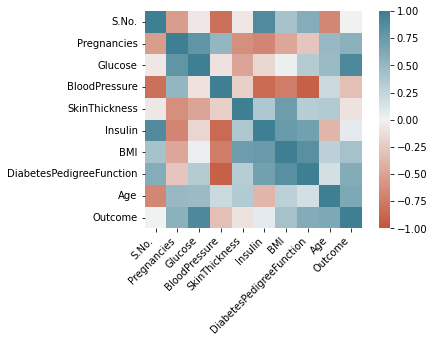

In [7]:
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

<AxesSubplot:xlabel='BMI'>

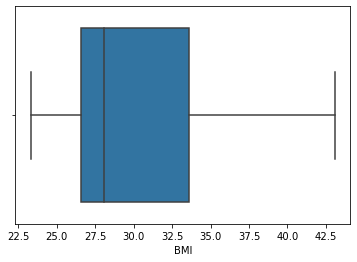

In [8]:
sns.boxplot(x=df['BMI'])

# ML Classifiers and Datasets 

In [16]:
# feature selection
feature_cols = ['Pregnancies', 'Insulin', 'BMI', 'Age', 'Glucose', 'BloodPressure', 'DiabetesPedigreeFunction']
x = df[feature_cols]
y = df.Outcome
x
y

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [10]:
# split data
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.3, random_state=1)

In [11]:
# build model
classifier = DecisionTreeClassifier()
classifier = classifier.fit(X_train, Y_train)
classifier

DecisionTreeClassifier()

In [12]:
# predict
y_pred = classifier.predict(X_test)
print(y_pred)

[1 0]


In [18]:
# confusion matrix
from sklearn.metrics import classification_report, confusion_matrix  
confusion_matrix(Y_test, y_pred)
print(confusion_matrix(Y_test, y_pred))
print(classification_report(Y_test, y_pred))

[[1 0]
 [0 1]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



# Accuracy

In [19]:
# accuracy
print("Accuracy:", metrics.accuracy_score(Y_test,y_pred))

Accuracy: 1.0
